# Handwritten Digit Recognition

## Random Forest

**In this project we are going to use Random Forest for the Handwritten Digit Recognition.**

- We will be using Scikit-Learn Dataset MNIST, which is the built in dataset in csv format used in Machine Learning Python.

1. Definition
   - It consists of a large number of individual decision trees that operate as an ensemble.
   - Random Forest Spits out a class prediction and the class with the most votes becomes our model prediction.
2. Hyperparameters
   1. n_estimators: The number trees the algorithm builds before taking the maximum voting or taking the averages of prediction.
   2. max_features: The maximum number of features random forest considers to split a node.
   3. min_sample: The minimum number of leaves required to split an internal node.
   4. n_jobs
      - how many processors it is allowed to use
      - '1' - limit
      - '-1' - no limit
   5. random_state: Produce the same results when it has the definite value.
   6. oob_score: Random Forest Cross validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance - out of bag samples.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv("Digit.csv")
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Extract the shape of the dataset to find the rows and columns
print(dataset.shape)

(42000, 785)


In [4]:
# Dividing the data into independent and dependent variables
x = dataset.iloc[:,1:]

In [5]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = dataset.iloc[:,0]

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
# Shape of the train and test sets
print(x_train.shape)
print(x_test.shape)

(31500, 784)
(10500, 784)


In [10]:
# Train the algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
# Predicting all the x_test values
y_pred = model.predict(x_test)

In [12]:
# Evaluating the model by finding the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model: 96.39999999999999%


Predicted 7


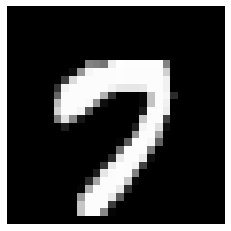

In [13]:
import matplotlib.pyplot as plt
index = 10
print("Predicted "+ str(model.predict(x_test)[index]))
plt.axis('off')
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')